# Определение перспективного тарифа для телеком компании.

<b>«Мегалайн»</b> — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: <b>«Смарт»</b> и <b>«Ультра»</b>. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей <b>«Мегалайна»</b>: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов:
<p></p>
<li>Тариф <b>«Смарт»:</b>
<ul>
<li>Ежемесячная плата: 550 рублей
<li>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
<li>Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
</ul>    
<li>Тариф <b>«Ультра»:</b>
<ul>
<li>Ежемесячная плата: 1950 рублей
<li>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
<li>Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
</ul>
<li><i>Примечание:</i>
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<b>План выполнения проекта.</b>
<ol>
<li>Откройте файлы с данными и изучите общую информацию.
<li>Подготовьте данные:
<ul>
<li>Приведите данные к нужным типам;
<li>Найдите и исправьте ошибки в данных.
<li>Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.
</ul>    
<li>Посчитайте для каждого пользователя:
<ul>
<li>количество сделанных звонков и израсходованных минут разговора по месяцам;
<li>количество отправленных сообщений по месяцам;
<li>объем израсходованного интернет-трафика по месяцам;
<li>помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
</ul>
<li>Проанализируйте данные:
<ul>
<li>Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
<li>Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
</ul>
<li>Проверьте гипотезы:
<ul>
<li>средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
<li>средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
</ul>
Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.
<li>Напишите общий вывод
</ol>

In [1032]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import stats as st

# 1. Откройте файлы с данными и изучите общую информацию.

Таблица calls (информация о звонках):
<li>id — уникальный номер звонка
<li>call_date — дата звонка
<li>duration — длительность звонка в минутах
<li>user_id — идентификатор пользователя, сделавшего звонок.

In [1033]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица internet (информация об интернет-сессиях):
<li>id — уникальный номер сессии
<li>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<li>session_date — дата интернет-сессии
<li>user_id — идентификатор пользователя.

In [1034]:
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv', index_col=0)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Таблица messages (информация о сообщениях):
<li>id — уникальный номер сообщения
<li>message_date — дата сообщения
<li>user_id — идентификатор пользователя, отправившего сообщение

In [1035]:
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица tariffs (информация о тарифах):
<li>tariff_name — название тарифа
<li>rub_monthly_fee — ежемесячная абонентская плата в рублях
<li>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<li>messages_included — количество сообщений в месяц, включённых в абонентскую плату
<li>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<li>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<li>rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<li>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

In [1036]:
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица users (информация о пользователях):
<li>user_id — уникальный идентификатор пользователя
<li>first_name — имя пользователя
<li>last_name — фамилия пользователя
<li>age — возраст пользователя (годы)
<li>reg_date — дата подключения тарифа (день, месяц, год)
<li>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<li>city — город проживания пользователя
<li>tariff — название тарифного плана.

In [1037]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


# 2. Подготовьте данные:

<ul>
<li>Приведите данные к нужным типам;
<li>Найдите и исправьте ошибки в данных.
<li>Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.
</ul>    

Начну с таблицы calls.

In [1038]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [1039]:
calls.dtypes

id            object
call_date     object
duration     float64
user_id        int64
dtype: object

Данные 'call_date' перевожу в тип datetime, а данные 'id' в тип int.

In [1040]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [1041]:
calls['id'] = calls['id'].astype('int')

In [1042]:
calls.dtypes

id                    int64
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Изменение типов сделано.

In [1043]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [1044]:
calls.duplicated().sum()

0

Пропущенных значений и дубликатов нет. Просмотрю какие вообще значения встречаются в разных столбцах этой таблицы.

In [1045]:
calls['id'].value_counts()

1054717    1
1011131    1
1017254    1
1021348    1
1027491    1
          ..
1250505    1
14877      1
1277124    1
12828      1
1054723    1
Name: id, Length: 202607, dtype: int64

In [1046]:
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

Здесь видно, что количество звонков увеличивается к концу года.

In [1047]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [1048]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

В столбце 'duration' много нулевых значений. Их около 20% от общего количества. Посмотрим, можно ли удалить их и что это даст.

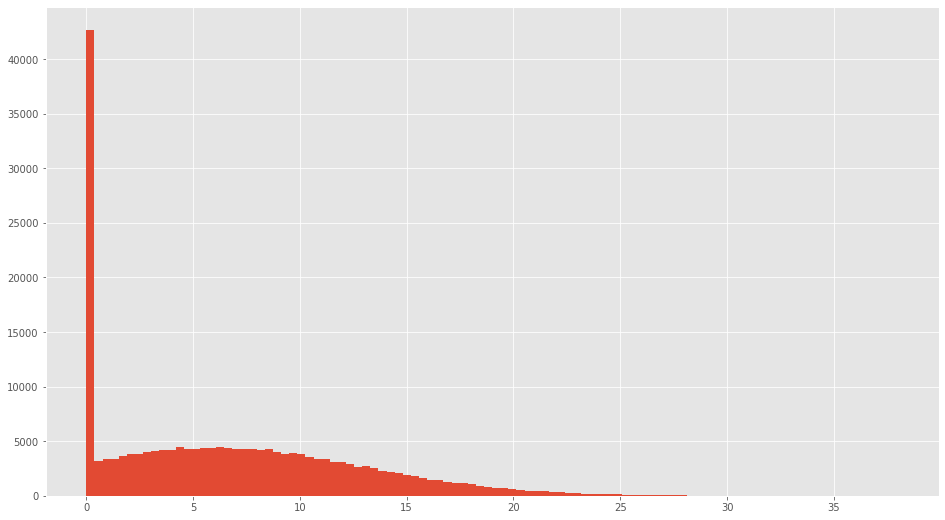

In [1049]:
calls['duration'].hist(figsize=(16,9), bins=100)

Видно, что нулевые значения вносят сильное возмущение в данные. Посмотрим, что изменится при их удалении.

In [1050]:
new_calls = calls.query('duration>0')

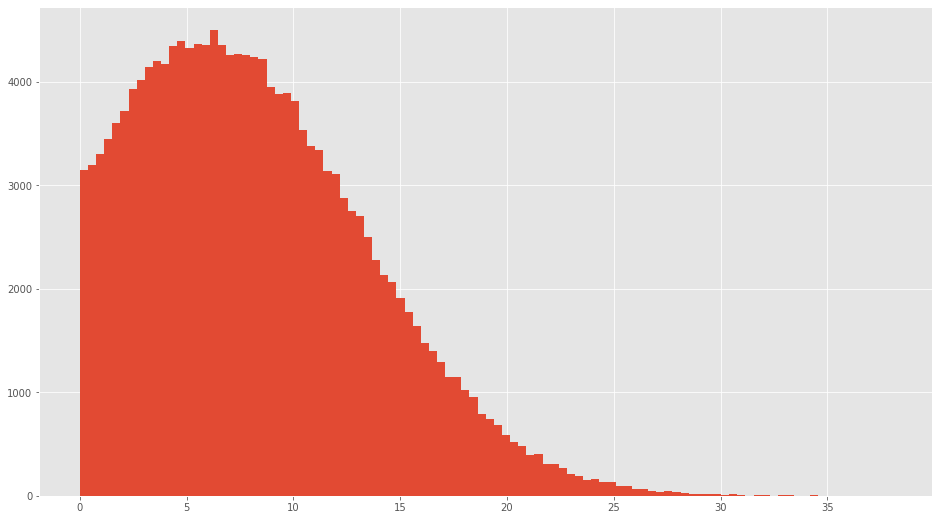

In [1051]:
new_calls['duration'].hist(figsize=(16,9), bins=100)

Распределение стало похоже на нормальное, сдвинутое влево. Выбросов нет.

In [1052]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [1053]:
new_calls['duration'].describe()

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

Среднее и медиана увеличились, а стандартное отклонение уменьшилось. Оставляю набор данных без нулевых значений.

In [1054]:
calls = new_calls

In [1055]:
calls.head()

,id,call_date,duration,user_id
2,10002,2018-06-11,2.85,1000
3,10003,2018-09-21,13.80,1000
4,10004,2018-12-15,5.18,1000
7,10007,2018-08-22,18.31,1000
8,10008,2018-09-15,18.44,1000


Далее - таблица internet.

In [1056]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [1057]:
internet.dtypes

id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

Данные 'session_date' перевожу в тип datetime, а данные 'id' в тип int.

In [1058]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [1059]:
internet['id'] = internet['id'].astype('int')

In [1060]:
internet.dtypes

id                       int64
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Изменения типов сделано.

In [1061]:
internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [1062]:
internet.duplicated().sum()

0

Пропущенных значений и дубликатов нет. Исследуем данные.

In [1063]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Нулевых значений 13% от общего количества.

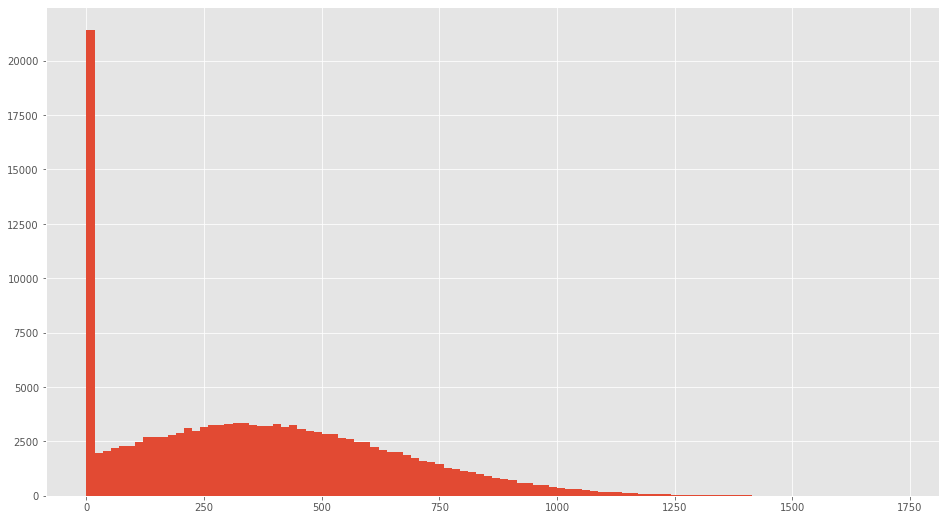

In [1064]:
internet['mb_used'].hist(figsize=(16,9), bins=100)

In [1065]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Эти значения вносят сильное влияние на общую картину и я удалю их. И, рассуждая логически, сессии с нулевым трафиком, скорее всего неудачные и нас не интересуют.

In [1066]:
internet = internet.query('mb_used>0')

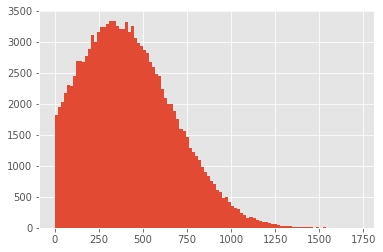

In [1067]:
internet['mb_used'].hist(bins=100)

Распределение стало похоже на нормальное, сдвинутое влево. Выбросов нет.

Далее - таблица messages.

In [1068]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [1069]:
messages.dtypes

id              object
message_date    object
user_id          int64
dtype: object

Данные 'message_date' перевожу в тип datetime, а данные 'id' в тип int.

In [1070]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [1071]:
messages['id'] = messages['id'].astype('int')

In [1072]:
messages.dtypes

id                       int64
message_date    datetime64[ns]
user_id                  int64
dtype: object

Изменения типов сделано.

In [1073]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [1074]:
messages.duplicated().sum()

0

Пропущенных значений и дубликатов нет.

Далее - таблица tariffs.

In [1075]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Заменю индексы на названия тарифов.

In [1076]:
tariffs = tariffs.set_index('tariff_name')

Для дальнейших подсчетов перевожу включенные мегабайты в гигабайты.

In [1077]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included']/1024).astype('int')

In [1078]:
tariffs.rename(columns={'mb_per_month_included' : 'gb_per_month_included'})

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15,500,550,200,3,3
ultra,1000,30,3000,1950,150,1,1


Далее - таблица users.

In [1079]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [1080]:
users.dtypes

user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object

Значения 'churn_date' и 'reg_date' перевожу в тип даты datetime.

In [1081]:
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [1082]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [1083]:
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [1084]:
users.duplicated().sum()

0

Дубликатов нет.

In [1085]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Столбец 'churn_date' — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Здесь подавляющее большинство пропущенных значений. Но они отображают событие и поэтому не буду их ничем заменять.

Рассмотрю значения в других столбцах.

In [1086]:
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Нет ничего необычного.

In [1087]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

В названиях городов тоже ничего необычного.

In [1088]:
users['first_name'].sort_values().unique()

array(['Авксентий', 'Агата', 'Агафья', 'Агнесса', 'Адам', 'Аким', 'Аксён',
       'Алан', 'Алевтина', 'Александр', 'Александра', 'Алексей', 'Алина',
       'Алиса', 'Алла', 'Альберта', 'Альбин', 'Альфред', 'Алёна',
       'Анатолий', 'Анвар', 'Ангелина', 'Андрей', 'Анжелика', 'Анита',
       'Антонина', 'Анфиса', 'Арина', 'Арнольд', 'Арсен', 'Арсений',
       'Артемий', 'Артём', 'Аурелия', 'Афанасий', 'Ахмет', 'Аюна',
       'Белла', 'Берта', 'Борис', 'Вадим', 'Валентина', 'Валерий',
       'Валерия', 'Варвара', 'Варлам', 'Василиса', 'Вениамин', 'Вера',
       'Вероника', 'Веселина', 'Виктор', 'Виктория', 'Виолетта',
       'Виталий', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Габриель', 'Габриэль', 'Гайдар', 'Галина', 'Гарри', 'Гектор',
       'Гелена', 'Геннадий', 'Геодар', 'Георгий', 'Георгина', 'Геральд',
       'Герасим', 'Глеб', 'Гордей', 'Григорий', 'Дайна', 'Дана', 'Даниил',
       'Даниэла', 'Дебора', 'Демьян', 'Денис', 'Джемма', 'Джозефина',
       'Джулия', '

Как много редких имён, но ничего аномального.

In [1089]:
users['last_name'].sort_values().unique()

array(['Ёлчина', 'Ёркин', 'Ёркина', 'Ёрохов', 'Ёрохова', 'Абаимов',
       'Абакумов', 'Абакшина', 'Абалакова', 'Абалдуева', 'Абалкин',
       'Абашкин', 'Абашкина', 'Абдулина', 'Абоимов', 'Абрамович',
       'Абрамцев', 'Абрамычева', 'Абрашина', 'Абрикосова', 'Авдеев',
       'Авдеенко', 'Авдонюшкин', 'Авдушева', 'Авдышев', 'Авдюков',
       'Авраамова', 'Авраменко', 'Авринский', 'Аврорин', 'Авроров',
       'Авросимова', 'Авросинова', 'Авсейкина', 'Авчинникова', 'Агаев',
       'Агаева', 'Агапеева', 'Агеева', 'Адаменко', 'Адамов', 'Азаров',
       'Азерников', 'Азимова', 'Акимов', 'Акимчин', 'Акимычева',
       'Акиндинов', 'Акинин', 'Акинфьев', 'Аксёнов', 'Акуленко',
       'Александрова', 'Александрович', 'Александрюк', 'Алексеева',
       'Алексеенко', 'Алексеичев', 'Аленникова', 'Алесин', 'Алехина',
       'Алешин', 'Алешина', 'Алешкова', 'Алиев', 'Алфеева', 'Алфимов',
       'Алфимова', 'Алымова', 'Алютин', 'Алюшина', 'Алёшко', 'Алёшкова',
       'Амелин', 'Амелишко', 'Амельченк

В фамилиях тоже нет ничего аномального.

# 3. Посчитайте для каждого пользователя:
<ul>
<li>количество сделанных звонков и израсходованных минут разговора по месяцам;
<li>количество отправленных сообщений по месяцам;
<li>объем израсходованного интернет-трафика по месяцам;
<li>помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
</ul>

In [1090]:
calls.head()

,id,call_date,duration,user_id
2,10002,2018-06-11,2.85,1000
3,10003,2018-09-21,13.80,1000
4,10004,2018-12-15,5.18,1000
7,10007,2018-08-22,18.31,1000
8,10008,2018-09-15,18.44,1000


Добавим столбец с названием месяца.

In [1091]:
calls['month'] = calls['call_date'].dt.month

Создадим таблицу с количеством и суммарной длительностью звонков по пользователям и месяцам. Перед этим округлим минуты в большую сторону.

In [1092]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [1093]:
calls.head()

,id,call_date,duration,user_id,month
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12
7,10007,2018-08-22,19,1000,8
8,10008,2018-09-15,19,1000,9


In [1094]:
calls_quantity = calls.groupby(['user_id', 'month'], as_index=False).agg({'duration':['count','sum']})

In [1095]:
calls_quantity.columns=['user_id', 'month', 'calls_count', 'duration_sum']

In [1096]:
calls_quantity.head()

,user_id,month,calls_count,duration_sum
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


Те же действия проделаем с таблицей messages и создадим новую таблицу messages_quantity с подсчитанным количеством сообщений по месяцам для каждого пользователя.

In [1097]:
messages['month'] = messages['message_date'].dt.month

In [1098]:
messages_quantity = messages.groupby(['user_id','month'], as_index=False).agg({'message_date':'count'})

In [1099]:
messages_quantity.columns = ['user_id','month','messages_count']

In [1100]:
messages_quantity.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Те же действия проделаем с таблицей internet и создадим новую таблицу internet_quantity с подсчитанным трафиком по месяцам для каждого пользователя. Перед этим округлим трафик в большую сторону.

In [1101]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [1102]:
internet['month'] = internet['session_date'].dt.month

In [1103]:
internet_quantity = internet.groupby(['user_id','month'], as_index=False).agg({'mb_used':'sum'})

In [1104]:
internet_quantity.columns = ['user_id','month','mb_sum']

In [1105]:
internet_quantity.head()

,user_id,month,mb_sum
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [1106]:
df = calls_quantity.merge(messages_quantity, how='outer')

In [1107]:
df = df.merge(internet_quantity, how='outer')

Добавим в таблицу столбец с тарифами и местом проживания, соответствующими клиентам.

In [1108]:
df = df.merge(users[['user_id', 'tariff','city']], on='user_id', how='outer')

После слияния таблиц появились пропущенные значения. Рассмотрим их.

In [1109]:
df.isna().sum()

user_id             0
month               2
calls_count        48
duration_sum       48
messages_count    499
mb_sum             15
tariff              0
city                0
dtype: int64

In [1110]:
df[df['calls_count'].isna()]

,user_id,month,calls_count,duration_sum,messages_count,mb_sum,tariff,city
1503,1240,2.0,NaN,NaN,NaN,961.0,ultra,Воронеж
1608,1257,7.0,NaN,NaN,146.0,20034.0,ultra,Санкт-Петербург
1609,1257,8.0,NaN,NaN,157.0,25506.0,ultra,Санкт-Петербург
1610,1257,9.0,NaN,NaN,153.0,22777.0,ultra,Санкт-Петербург
2327,1373,1.0,NaN,NaN,28.0,9184.0,smart,Улан-Удэ
2328,1373,4.0,NaN,NaN,48.0,20399.0,smart,Улан-Удэ
2329,1373,6.0,NaN,NaN,48.0,12457.0,smart,Улан-Удэ
3039,1476,4.0,NaN,NaN,NaN,531.0,ultra,Москва
3176,1091,5.0,NaN,NaN,30.0,10714.0,ultra,Набережные Челны
3177,1091,6.0,NaN,NaN,30.0,10245.0,ultra,Набережные Челны


In [1111]:
df[df['messages_count'].isna()]

,user_id,month,calls_count,duration_sum,messages_count,mb_sum,tariff,city
8,1001,11.0,45.0,430.0,NaN,18452.0,smart,Москва
9,1001,12.0,47.0,414.0,NaN,14053.0,smart,Москва
42,1006,2.0,3.0,42.0,NaN,1395.0,smart,Ульяновск
43,1006,3.0,36.0,286.0,NaN,17309.0,smart,Ульяновск
44,1006,4.0,38.0,356.0,NaN,13954.0,smart,Ульяновск
...,...,...,...,...,...,...,...,...
3145,1494,10.0,45.0,354.0,NaN,17794.0,smart,Омск
3146,1494,11.0,46.0,411.0,NaN,18076.0,smart,Омск
3147,1494,12.0,54.0,418.0,NaN,17645.0,smart,Омск
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский


In [1112]:
df[df['mb_sum'].isna()]

,user_id,month,calls_count,duration_sum,messages_count,mb_sum,tariff,city
584,1094,5.0,12.0,107.0,3.0,NaN,ultra,Новосибирск
1697,1273,5.0,19.0,220.0,21.0,NaN,ultra,Курган
1698,1273,6.0,28.0,230.0,38.0,NaN,ultra,Курган
1699,1273,7.0,30.0,253.0,37.0,NaN,ultra,Курган
1700,1273,8.0,39.0,253.0,41.0,NaN,ultra,Курган
1701,1273,9.0,28.0,223.0,32.0,NaN,ultra,Курган
1702,1273,10.0,35.0,315.0,35.0,NaN,ultra,Курган
1703,1273,11.0,31.0,272.0,29.0,NaN,ultra,Курган
1704,1273,12.0,38.0,260.0,39.0,NaN,ultra,Курган
2278,1365,10.0,5.0,43.0,1.0,NaN,smart,Ростов-на-Дону


Скорее всего такие значения просто означают, что таким людям не нужны звонки или сообщения или интернет на телефоне. Поэтому заполняю такие значения нулями. В двух наблюдениях не внесен номер месяца. Возможно, это новички.

In [1113]:
df[df['month'].isna()]

,user_id,month,calls_count,duration_sum,messages_count,mb_sum,tariff,city
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский
3215,1371,NaN,NaN,NaN,NaN,NaN,smart,Омск


In [1114]:
df['month'] = df['month'].fillna(0)
df['calls_count'] = df['calls_count'].fillna(0)
df['messages_count'] = df['messages_count'].fillna(0)
df['mb_sum'] = df['mb_sum'].fillna(0)
df['duration_sum'] = df['duration_sum'].fillna(0)

In [1115]:
df.isna().sum()

user_id           0
month             0
calls_count       0
duration_sum      0
messages_count    0
mb_sum            0
tariff            0
city              0
dtype: int64

In [1116]:
df.duplicated().sum()

0

Нулевые знаения убраны. Дубликатов тоже нет. Проверим типы.

In [1117]:
df.dtypes

user_id             int64
month             float64
calls_count       float64
duration_sum      float64
messages_count    float64
mb_sum            float64
tariff             object
city               object
dtype: object

При слиянии таблиц столбцы calls_count, duration_sum, messages_count и mb_sum приняли тип числа с плавающей точкой - float. Меняю на целочисленный тип int.

In [1118]:
df['month'] = df['month'].astype('int')
df['calls_count'] = df['calls_count'].astype('int')
df['duration_sum'] = df['duration_sum'].astype('int')
df['messages_count'] = df['messages_count'].astype('int')
df['mb_sum'] = df['mb_sum'].astype('int')

In [1119]:
df.dtypes

user_id            int64
month              int64
calls_count        int64
duration_sum       int64
messages_count     int64
mb_sum             int64
tariff            object
city              object
dtype: object

In [1120]:
df.head()

,user_id,month,calls_count,duration_sum,messages_count,mb_sum,tariff,city
0,1000,5,17,159,22,2256,ultra,Краснодар
1,1000,6,28,172,60,23257,ultra,Краснодар
2,1000,7,41,340,75,14016,ultra,Краснодар
3,1000,8,42,408,81,14070,ultra,Краснодар
4,1000,9,46,466,57,14581,ultra,Краснодар


Примечание: 
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 
Учтем это и переведем трафик в гигабайты а затем округлим в большую сторону.

In [1122]:
df['mb_sum'] = (df['mb_sum']/1024).apply(np.ceil).astype('int')
df = df.rename(columns={'mb_sum': 'gb_sum'})

Посчитаем выручку по месяцам.

In [1124]:
def revenue_all(row):
    co = tariffs.loc[row['tariff']][2] - row['duration_sum']    #calls overspending
    if co < 0: co = abs(co)
    elif co >= 0: co = 0
    mo = tariffs.loc[row['tariff']][0] - row['messages_count']   #messages overspending
    if mo<0: mo = abs(mo)
    elif mo>=0: mo = 0
    to = tariffs.loc[row['tariff']][1] - row['gb_sum']   #internet traffic overspending
    if to<0: to = abs(to)
    elif to>=0: to = 0
    return co*(tariffs.loc[row['tariff']][6]) + mo*(tariffs.loc[row['tariff']][5]) + to*(tariffs.loc[row['tariff']][4]) + tariffs.loc[row['tariff']][3]
    

In [1125]:
df['revenue'] = df.apply(revenue_all, axis=1)

# 4. Проанализируйте данные:
<ul>
<li>Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
<li>Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [1126]:
behavior_smart = df.query('tariff == "smart"')

In [1127]:
behavior_smart.head()

,user_id,month,calls_count,duration_sum,messages_count,gb_sum,tariff,city,revenue
8,1001,11,45,430,0,19,smart,Москва,1350
9,1001,12,47,414,0,14,smart,Москва,550
10,1002,6,14,117,4,11,smart,Стерлитамак,550
11,1002,7,21,214,11,18,smart,Стерлитамак,1150
12,1002,8,37,289,13,20,smart,Стерлитамак,1550


In [1128]:
behavior_ultra = df.query('tariff == "ultra"')

In [1129]:
behavior_ultra.head()

,user_id,month,calls_count,duration_sum,messages_count,gb_sum,tariff,city,revenue
0,1000,5,17,159,22,3,ultra,Краснодар,1950
1,1000,6,28,172,60,23,ultra,Краснодар,1950
2,1000,7,41,340,75,14,ultra,Краснодар,1950
3,1000,8,42,408,81,14,ultra,Краснодар,1950
4,1000,9,46,466,57,15,ultra,Краснодар,1950


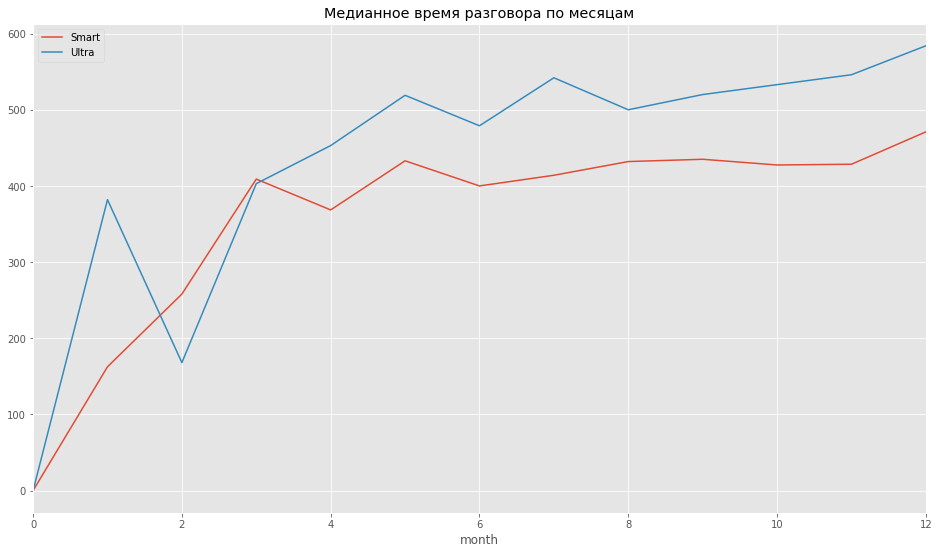

In [1130]:
behavior_smart.groupby('month')['duration_sum'].agg('median').plot(kind='line', title='Медианное время разговора по месяцам', grid=True, figsize=(16,9))
behavior_ultra.groupby('month')['duration_sum'].agg('median').plot(kind='line', title='Медианное время разговора по месяцам', grid=True, figsize=(16,9))
plt.legend(['Smart','Ultra'])

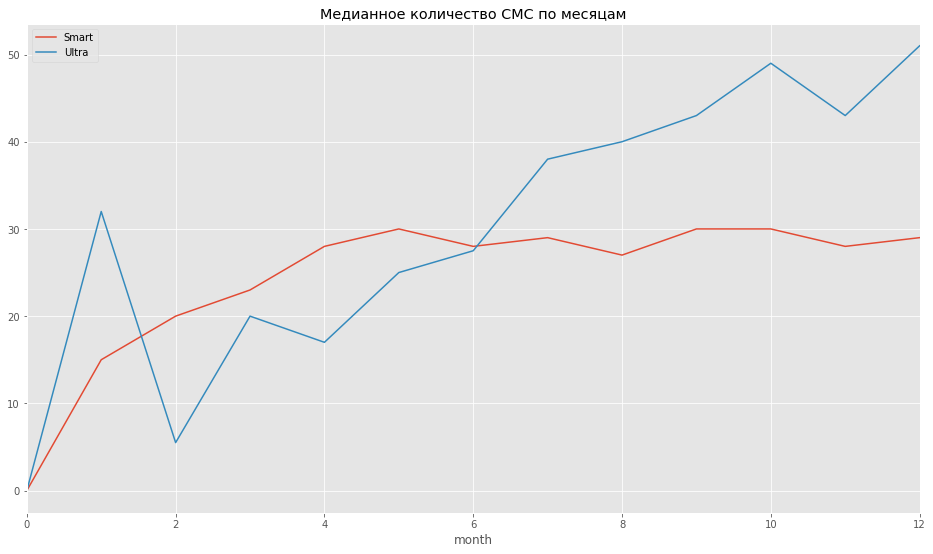

In [1131]:
behavior_smart.groupby('month')['messages_count'].agg('median').plot(kind='line', title='Медианное количество СМС по месяцам', grid=True, figsize=(16,9))
behavior_ultra.groupby('month')['messages_count'].agg('median').plot(kind='line', title='Медианное количество СМС по месяцам', grid=True, figsize=(16,9))
plt.legend(['Smart','Ultra'])

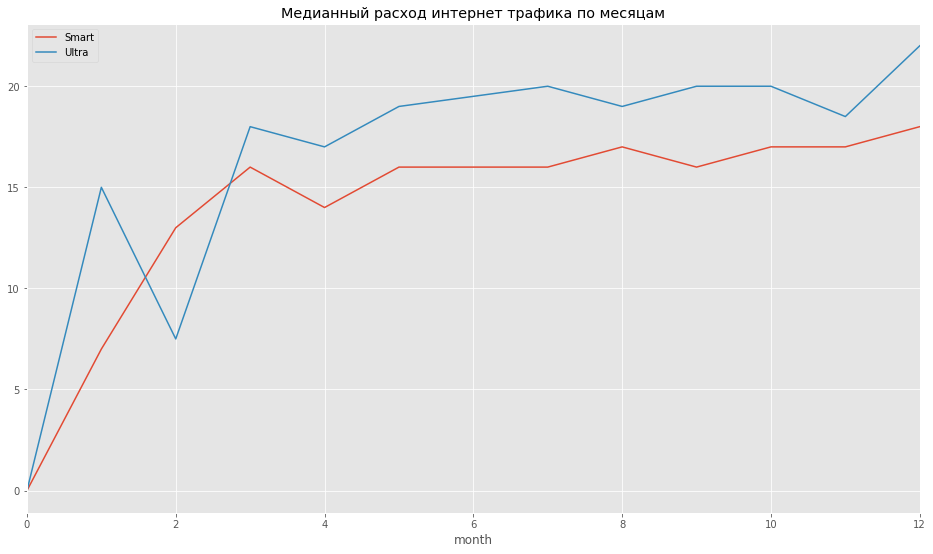

In [1132]:
behavior_smart.groupby('month')['gb_sum'].agg('median').plot(kind='line', title='Медианный расход интернет трафика по месяцам', grid=True, figsize=(16,9))
behavior_ultra.groupby('month')['gb_sum'].agg('median').plot(kind='line', title='Медианный расход интернет трафика по месяцам', grid=True, figsize=(16,9))
plt.legend(['Smart','Ultra'])

Глядя на графики можно сделать выводы:

1. В целом поведение клиентов с разными тарифами не отличается;
2. Пользователи тарифа Ultra более активны.

In [1133]:
df[df['tariff']=='smart']['duration_sum'].describe()

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: duration_sum, dtype: float64

In [1134]:
df[df['tariff']=='ultra']['duration_sum'].describe()

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: duration_sum, dtype: float64

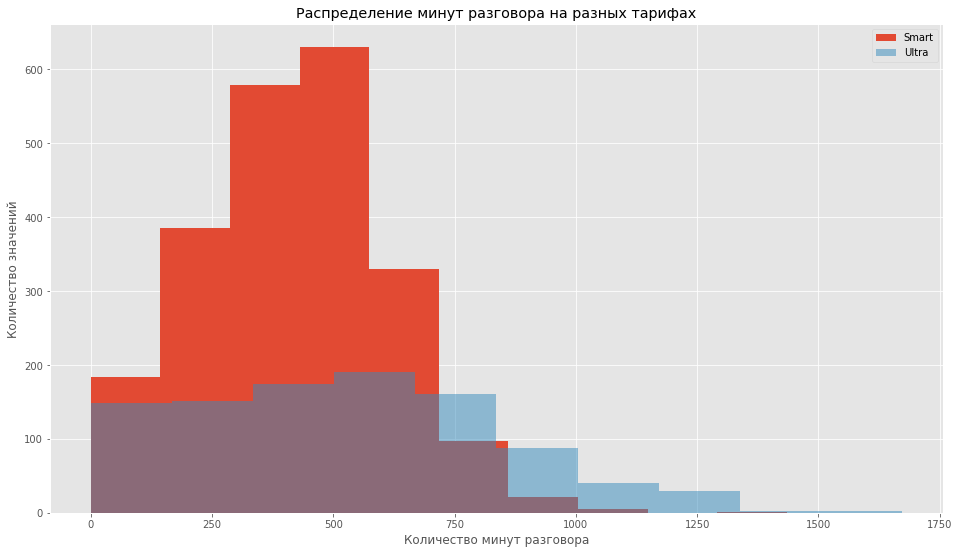

In [1135]:
behavior_smart['duration_sum'].plot(kind='hist', title='Распределение минут разговора на разных тарифах',figsize=(16,9), grid=True)
behavior_ultra['duration_sum'].plot(kind='hist', title='Распределение минут разговора на разных тарифах',figsize=(16,9), grid=True, alpha=0.5)
plt.xlabel("Количество минут разговора")
plt.ylabel("Количество значений")

plt.legend(['Smart','Ultra'])

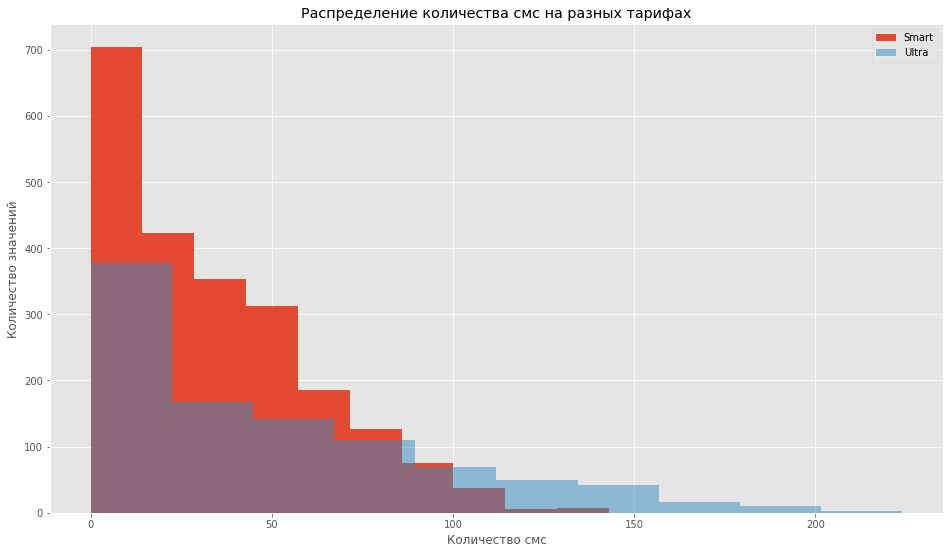

In [1136]:
behavior_smart['messages_count'].plot(kind='hist', title='Распределение количества смс на разных тарифах',figsize=(16,9), grid=True)
behavior_ultra['messages_count'].plot(kind='hist', title='Распределение количества смс на разных тарифах',figsize=(16,9), grid=True, alpha=0.5)
plt.xlabel("Количество смс")
plt.ylabel("Количество значений")
plt.legend(['Smart','Ultra'])

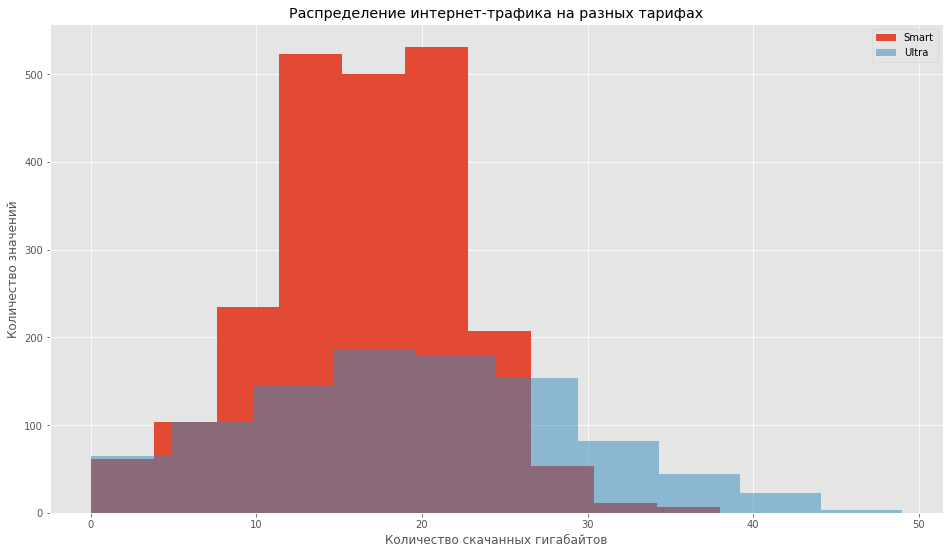

In [1137]:
behavior_smart['gb_sum'].plot(kind='hist', title='Распределение интернет-трафика на разных тарифах',figsize=(16,9), grid=True)
behavior_ultra['gb_sum'].plot(kind='hist', title='Распределение интернет-трафика на разных тарифах',figsize=(16,9), grid=True, alpha=0.5)
plt.xlabel("Количество скачанных гигабайтов")
plt.ylabel("Количество значений")
plt.legend(['Smart','Ultra'])

В целом по гистограммам можно сделать вывод, что пользователи тарифа Ultra больше используют минут разговора, смс и интернета. 

Посмотрим статистические показатели. Посмотрим различия в средних значениях, дисперсии и стандартных отклонениях на разных тарифах по трем показателям (минуты разговора, количество сообщений, интернет-трафик).

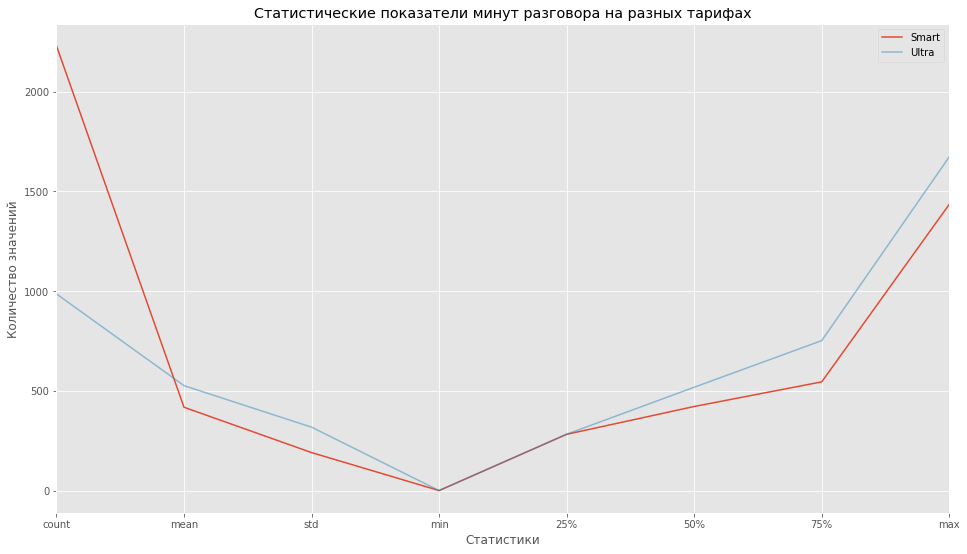

In [1139]:
behavior_smart['duration_sum'].describe().plot(kind='line', title='Статистические показатели минут разговора на разных тарифах',figsize=(16,9), grid=True)
behavior_ultra['duration_sum'].describe().plot(kind='line', title='Статистические показатели минут разговора на разных тарифах',figsize=(16,9), grid=True, alpha=0.5)
plt.xlabel("Статистики")
plt.ylabel("Количество значений")

plt.legend(['Smart','Ultra'])

Здесь наблюдаем различия в средних и медианных значениях, что естественно, тк на тарифе Ultra предоставляется больше бесплатных минут, смс и интернет трафика. Также отличие в стандартном отклонении обусловлено разным числом наблюдений. В тарифе Ultra наблюдений меньше и поэтому отклонение больше.

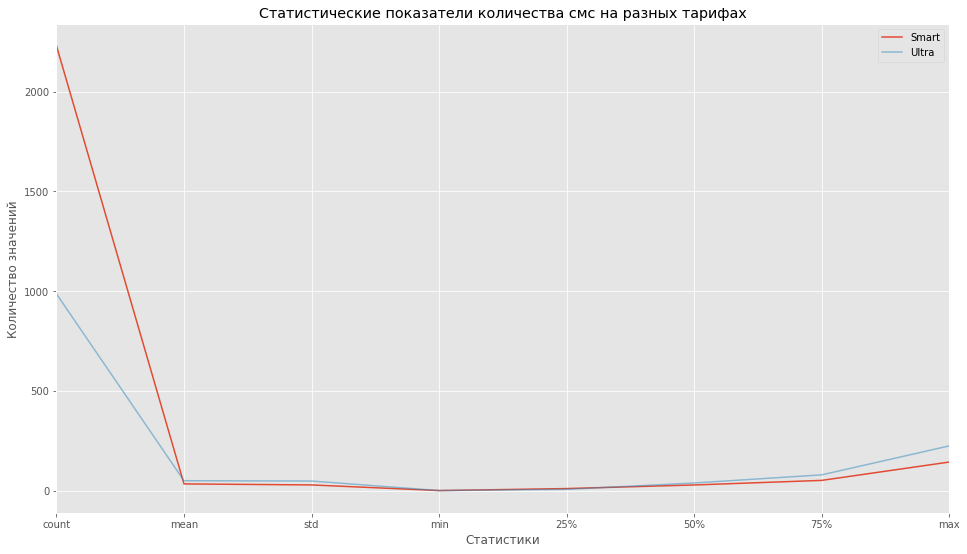

In [1140]:
behavior_smart['messages_count'].describe().plot(kind='line', title='Статистические показатели количества смс на разных тарифах',figsize=(16,9), grid=True)
behavior_ultra['messages_count'].describe().plot(kind='line', title='Статистические показатели количества смс на разных тарифах',figsize=(16,9), grid=True, alpha=0.5)
plt.xlabel("Статистики")
plt.ylabel("Количество значений")

plt.legend(['Smart','Ultra'])

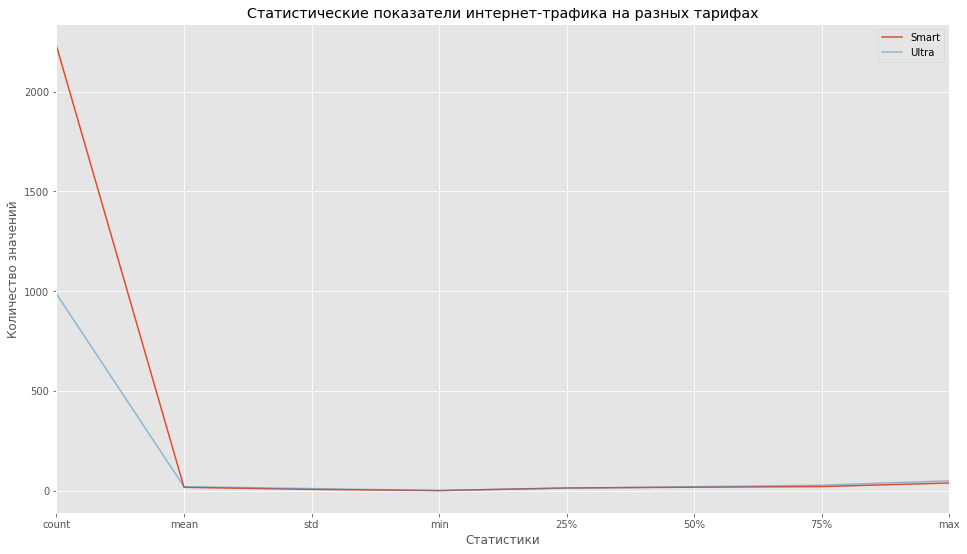

In [1141]:
behavior_smart['gb_sum'].describe().plot(kind='line', title='Статистические показатели интернет-трафика на разных тарифах',figsize=(16,9), grid=True)
behavior_ultra['gb_sum'].describe().plot(kind='line', title='Статистические показатели интернет-трафика на разных тарифах',figsize=(16,9), grid=True, alpha=0.5)
plt.xlabel("Статистики")
plt.ylabel("Количество значений")

plt.legend(['Smart','Ultra'])

В потраченных смс и гигабайтах разница практически незаметна. Что показывает одинаковое поведение клиентов на разных тарифах.

In [1142]:
print(np.var(behavior_smart['duration_sum']))
print(np.var(behavior_ultra['duration_sum']))

36265.12415310985
100950.00623331098


In [1143]:
print(np.var(behavior_smart['messages_count']))
print(np.var(behavior_ultra['messages_count']))

796.5978766916688
2283.0995570851965


In [1144]:
print(np.var(behavior_smart['gb_sum']))
print(np.var(behavior_ultra['gb_sum']))

33.25052283375897
97.52379664182943


На тарифе Smart дисперсия меньше в 3 раза, что означает большую точность выборки (и сама выборка в 3 раза больше).

Рассмотрим самый главный показатель - выручку клиентов на разных тарифах.

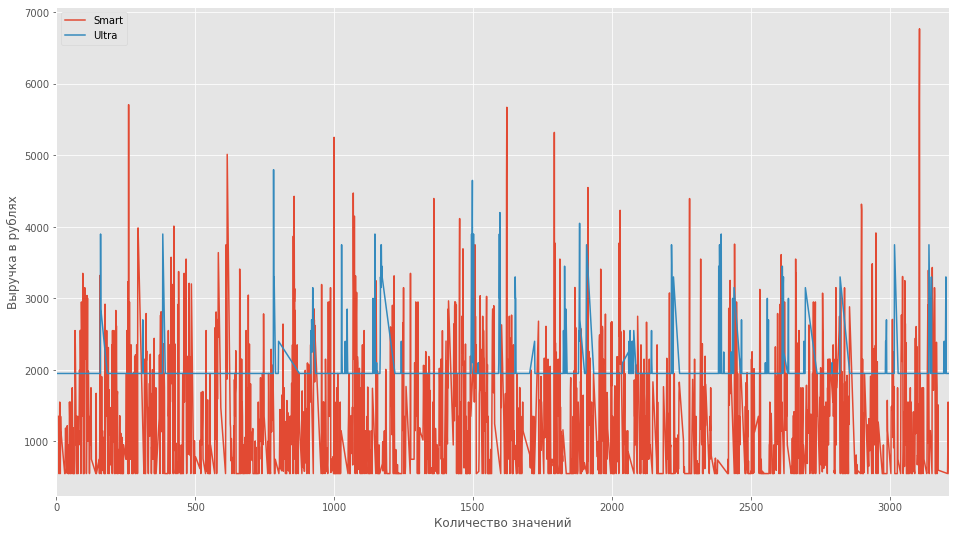

In [1145]:
behavior_smart['revenue'].plot(figsize=(16,9), grid=True)
behavior_ultra['revenue'].plot(figsize=(16,9), grid=True)
plt.xlabel("Количество значений")
plt.ylabel("Выручка в рублях")
plt.legend(['Smart','Ultra'])

На графике видно, что выручка с клиентов обоих тарифов самая разнообразная. 

Рассмотрим статистики по выручке на разных тарифах.

In [1146]:
behavior_smart['revenue'].describe()

count    2230.000000
mean     1294.305381
std       820.900496
min       550.000000
25%       550.000000
50%      1037.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

На тарифе Smart примерно четверть клиентов контролируют свои траты. Больше половины клиентов тратят в 2 раза больше ежемесячной платы. Основной источник прибыли на этом тарифе - плата за перерасход минут, смс или гигабайт.

In [1147]:
behavior_ultra['revenue'].describe()

count     986.000000
mean     2070.943205
std       378.629673
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

На тарифе Ultra больше 75% клиентов держат себя в рамках и не превышают трат. Среднее и медианное значение почти равно абонентской плате по тарифу.

In [1148]:
behavior_smart['revenue'].sum()

2886301

In [1149]:
behavior_ultra['revenue'].sum()

2041950

In [1167]:
((2886301-2041950)/2886301)*100

29.253740341010865

Выручка с клиентов Smart на 30% выше чем с клиентов тарифа Ultra.

# 5. Проверьте гипотезы:

<ul>
<li>средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
<li>средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
</ul>
Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 
Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.
Альтернативная гипотеза: гипотеза, обратная нулевой - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Проверка гипотезы о равенстве среднего двух генеральных совокупностей (тариф Smart и тариф Ultra) по взятым из них выборкам производим с помощью встроенных инструментов.

In [1153]:
alpha = 0.05
sample_1 = behavior_smart['revenue']
sample_2 = behavior_ultra['revenue']
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение:  1.2414049931248708e-246
Отвергаем нулевую гипотезу


Значит действительно, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Проверим это, подсчитав вручную.

In [1155]:
behavior_smart['revenue'].mean()

1294.3053811659192

In [1156]:
behavior_ultra['revenue'].mean()

2070.943204868154

In [1173]:
((2070-1294)/2070)*100

37.487922705314006

Проверка подтверждает гипотезу.

Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Проверка гипотезы о равенстве среднего двух генеральных совокупностей (московские и немосковские пользователи) по взятым из них выборкам производим с помощью встроенных инструментов.

In [1157]:
df_Moscow = df[df['city'] == "Москва"]
df_not_Moscow = df[df['city'] != "Москва"]

In [1158]:
df_Moscow = df_Moscow['revenue']
df_not_Moscow = df_not_Moscow['revenue']

In [1159]:
alpha = 0.05
sample_1 = df_Moscow
sample_2 = df_not_Moscow
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.5086199993481282
Не получилось отвергнуть нулевую гипотезу


Значит действительно,  средняя выручка пользователей из Москвы существенно не отличается от выручки пользователей из других регионов. Проверим это, подсчитав вручную.

In [1160]:
df_Moscow.mean()

1550.8052373158755

In [1161]:
df_not_Moscow.mean()

1528.1032629558542

In [1172]:
((1550-1528)/1550)*100

1.4193548387096775

Проверка подтверждает гипотезу. Разница в выручке меньше 1,5%.

# 6. Напишите общий вывод.

Поведение клиентов на разных тарифах сильно отличается. Клиенты Ultra в основном не перерасходуют бесплатные звонки, смс и интернет. Основная выручка от них - это ежемесячная плата. Клиенты Smart наоборот в основном перерасходуют бесплатные звонки, смс и интернет. Основная выручка от них - это плата за перерасход.

Проверка первой гипотезы показала, что средняя выручка на разных тарифах различается. Выручка от пользователей тарифа «Ультра» почти на 38% выше чем тарифа Smart. Проверка второй гипотезы показала, что выручка с клиентов из Москвы и неМосквы почти не различается. Выручка с московских клиентов всего на 1.4% выше.

В общем, можно сказать, что тариф Ultra более доходный , а место проживания клиента не играет роли.